Name:Sayali Dhomase


Task 2:Car Price Prediction With Machine Learning

Loading Dataset

In [1]:
from google.colab import files
uploaded=files.upload()

Saving car.csv to car.csv


Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
df=0
num=0

In [3]:
data=pd.read_csv("/content/car.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data=data.drop_duplicates()

<ipython-input-16-a08796d0c53c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=data[numeric_features].corr()


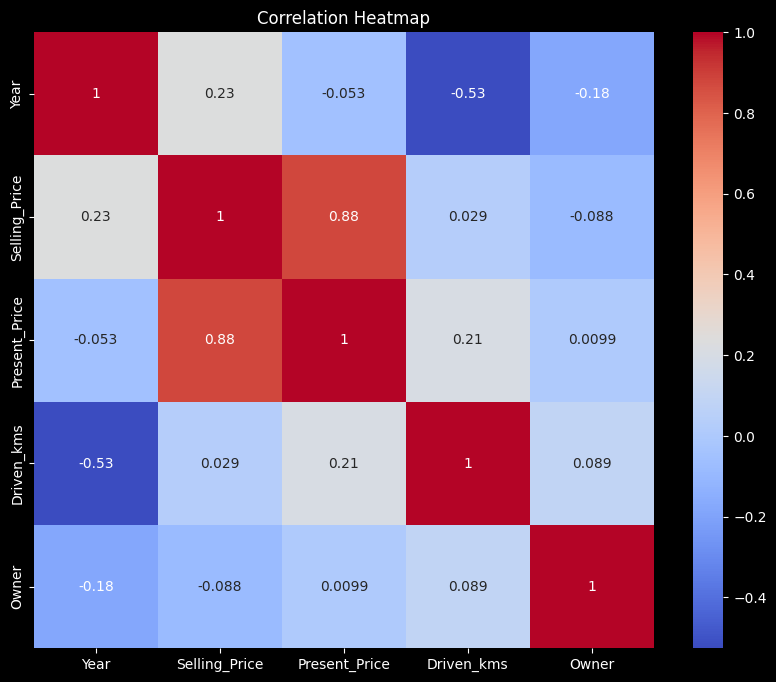

In [16]:
#Correlation heatmap
numeric_features=['Car_Name','Year','Selling_Price','Present_Price',
                  'Driven_kms','Fuel_Type','Selling_type','Transmission','Owner']
correlation_matrix=data[numeric_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [9]:
print(data.corr())

                   Year  Selling_Price  Present_Price  Driven_kms     Owner
Year           1.000000       0.234369      -0.053167   -0.525714 -0.181639
Selling_Price  0.234369       1.000000       0.876305    0.028566 -0.087880
Present_Price -0.053167       0.876305       1.000000    0.205224  0.009948
Driven_kms    -0.525714       0.028566       0.205224    1.000000  0.089367
Owner         -0.181639      -0.087880       0.009948    0.089367  1.000000


<ipython-input-9-40835d1ef585>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


In [10]:
print(data.tail(20))


    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
281     city  2006           2.10           7.60       50456    Petrol   
282     city  2014           8.25          14.00       63000    Diesel   
283     city  2016           8.99          11.80        9010    Petrol   
284     brio  2013           3.50           5.90        9800    Petrol   
285     jazz  2016           7.40           8.50       15059    Petrol   
286     jazz  2016           5.65           7.90       28569    Petrol   
287    amaze  2015           5.75           7.50       44000    Petrol   
288     city  2015           8.40          13.60       34000    Petrol   
289     city  2016          10.11          13.60       10980    Petrol   
290    amaze  2014           4.50           6.40       19000    Petrol   
291     brio  2015           5.40           6.10       31427    Petrol   
292     jazz  2016           6.40           8.40       12000    Petrol   
293     city  2010           3.25     

In [11]:
data.shape

(299, 9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


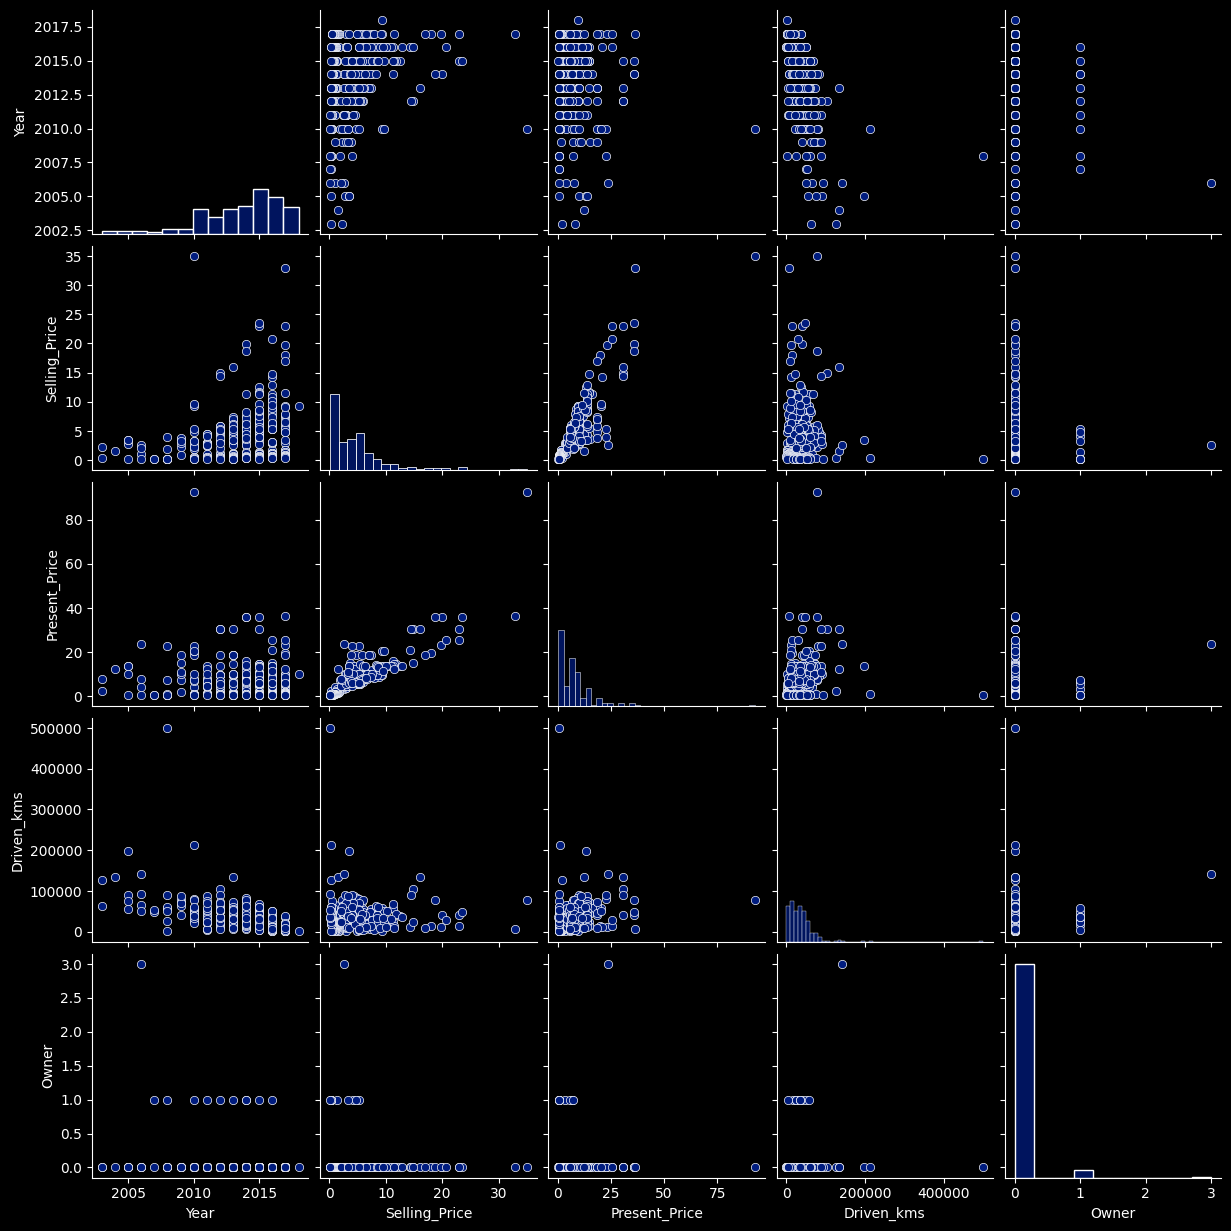

In [13]:
sns.pairplot(data)
plt.show()